# Recurrent Neural Networks as Language Models

In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# In these functions, z and x are vectors.
# We are doing an element wise operation on the vector.
softmax = lambda z: np.exp(z - np.max(z)) / np.sum(np.exp(z - np.max(z)))
sigmoid = lambda x: 1.0 / (1.0 + np.exp(-x))

def rnn(s, wemb, U, W, V):
    s_n = sigmoid( U * wemb + W * s )
    y = softmax( V * s_n )
    return s_n, y


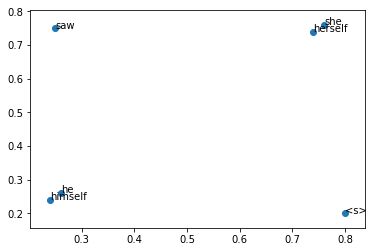

In [21]:
wemb = { 
    '<s>': np.mat('0.8; 0.2'),
    'he': np.mat('0.26; 0.26'),
    'himself': np.mat('0.24; 0.24'),
    'she': np.mat('0.76; 0.76'),
    'herself': np.mat('0.74; 0.74'),
    'saw': np.mat('0.25; 0.75'),
    }

np.mat('0.26; 0.26').item(0,0)
x = []
y = []
for w in wemb.keys():
    x.append(wemb[w].item(0,0))
    y.append(wemb[w].item(1,0))
#print x, y
fig, ax = plt.subplots()
ax.scatter(x, y)
for w in wemb.keys():
    ax.annotate(w, (wemb[w].item(0,0), wemb[w].item(1,0)))


In [24]:
U = np.mat('1.0, 1.0; 1.0, 1.0')
W = np.mat('1.0, 1.0; 1.0, 1.0')
V = np.mat('0.75, 0.25; 0.26, 0.26; 0.24, 0.24; 0.76, 0.76; 0.74, 0.74; 0.25, 0.75')
V_words = wemb.keys()
s_0 = np.mat('0; 0')


In [41]:
import operator
sent = '<s> she saw herself'.split()
s = s_0
for w in sent:
    s_n, y = rnn(s, wemb[w], U, W, V)
    print "y:\n", y
    y_vals = [i for i in enumerate(map(lambda x: x.item(0,0), y))]
    print y_vals
    max_index, max_value = max(y_vals, key=operator.itemgetter(1))
    print "w, max(y):", V_words[max_index], max_value
    print "state:\n", s_n
    s = s_n

print '='*20
U = np.mat('1.0, 1.0; 1.0, 1.0')
print sigmoid(U * np.mat('0.26; 0.26'))

y:
[[ 0.15947263]
 [ 0.11227646]
 [ 0.10904077]
 [ 0.23322946]
 [ 0.22650804]
 [ 0.15947263]]
[(0, 0.15947263293457503), (1, 0.1122764585110807), (2, 0.10904077188380022), (3, 0.23322946284887747), (4, 0.22650804088709156), (5, 0.15947263293457503)]
w, max(y): she 0.233229462849
state:
[[ 0.73105858]
 [ 0.73105858]]
y:
[[ 0.15474262]
 [ 0.09799521]
 [ 0.09433461]
 [ 0.25383342]
 [ 0.24435152]
 [ 0.15474262]]
[(0, 0.15474261797965527), (1, 0.09799520668129748), (2, 0.09433461347299933), (3, 0.2538334227240058), (4, 0.24435152116238681), (5, 0.15474261797965527)]
w, max(y): she 0.253833422724
state:
[[ 0.95175967]
 [ 0.95175967]]
y:
[[ 0.15483113]
 [ 0.09822742]
 [ 0.09457229]
 [ 0.25348521]
 [ 0.24405282]
 [ 0.15483113]]
[(0, 0.1548311273802911), (1, 0.09822741550548778), (2, 0.09457229337019982), (3, 0.2534852138142801), (4, 0.24405282254945024), (5, 0.1548311273802911)]
w, max(y): she 0.253485213814
state:
[[ 0.94802014]
 [ 0.94802014]]
y:
[[ 0.15438035]
 [ 0.09705567]
 [ 0.09337343]
